In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('medical_cost_insurance.csv') # read data in dataframe
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Replacing string values to numbers
df['sex'] = df['sex'].apply({'male':0,      'female':1}.get) 
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,0,30.97,3,0,3,10600.5483
1334,18,1,31.92,0,0,4,2205.9808
1335,18,1,36.85,0,0,2,1629.8335
1336,21,1,25.80,0,0,1,2007.9450
1337,61,1,29.07,0,1,3,29141.3603


In [6]:
df.shape

(1338, 7)

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

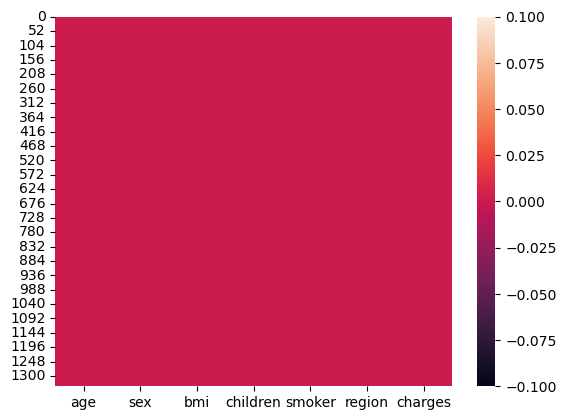

In [8]:
sns.heatmap(df.isnull())

# summary statistic

In [9]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


In [10]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region      0.038101
charges     1.515880
dtype: float64

<AxesSubplot:>

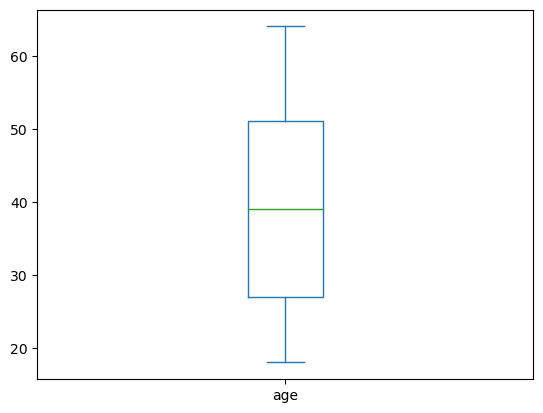

In [11]:
df['age'].plot.box()

age shows no outlier

<AxesSubplot:>

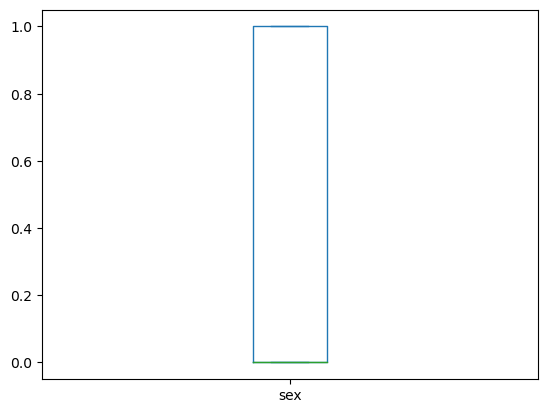

In [12]:
df['sex'].plot.box()

<AxesSubplot:>

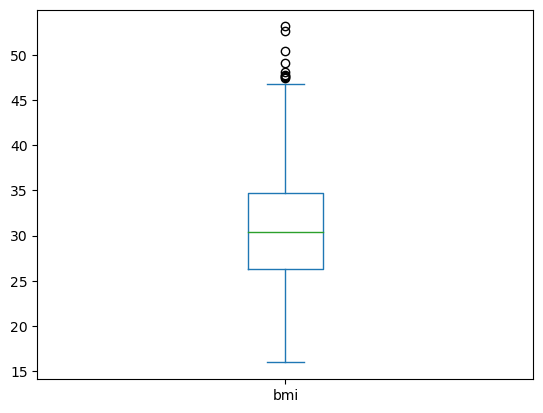

In [15]:
df['bmi'].plot.box()

bmi have outliers

<AxesSubplot:>

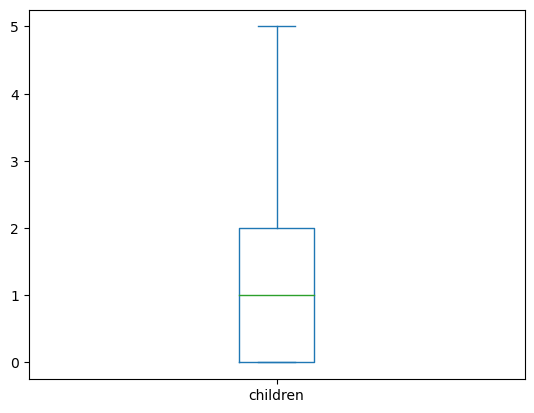

In [16]:
df['children'].plot.box()

<AxesSubplot:>

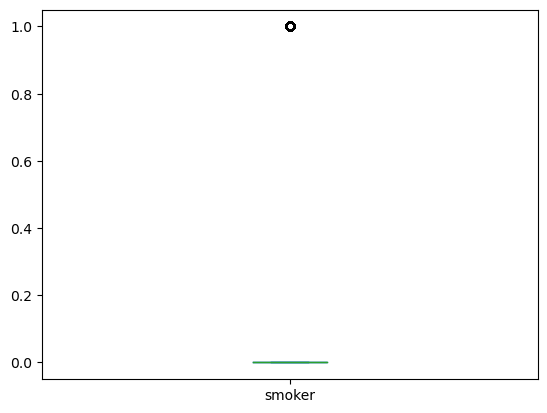

In [17]:
df['smoker'].plot.box()

<AxesSubplot:>

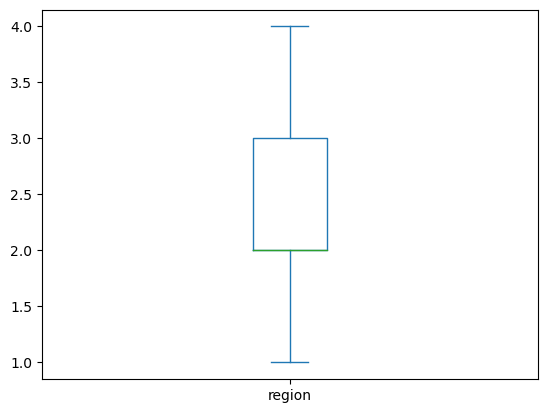

In [18]:
df['region'].plot.box()

<AxesSubplot:>

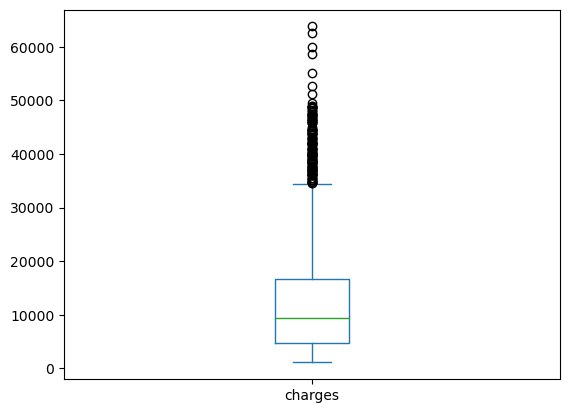

In [19]:
df['charges'].plot.box()

charges have large no of outliers

# removing outliers

In [20]:
from scipy.stats import zscore
z= np.abs(zscore(df))
z

,age,sex,bmi,children,smoker,region,charges
0,1.438764,1.010519,0.453320,0.908614,1.970587,1.343905,0.298584
1,1.509965,0.989591,0.509621,0.078767,0.507463,0.438495,0.953689
2,0.797954,0.989591,0.383307,1.580926,0.507463,0.438495,0.728675
3,0.441948,0.989591,1.305531,0.908614,0.507463,0.466915,0.719843
4,0.513149,0.989591,0.292556,0.908614,0.507463,0.466915,0.776802
...,...,...,...,...,...,...,...
1333,0.768473,0.989591,0.050297,1.580926,0.507463,0.466915,0.220551
1334,1.509965,1.010519,0.206139,0.908614,0.507463,1.372326,0.914002
1335,1.509965,1.010519,1.014878,0.908614,0.507463,0.438495,0.961596
1336,1.296362,1.010519,0.797813,0.908614,0.507463,1.343905,0.930362


In [21]:
# threshold for zscore value    
#above 3 are considerd as outlier
threshold=3
print(np.where(z>3))

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
        640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
       1130, 1146, 1230, 1245, 1272, 1300, 1317], dtype=int64), array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
       3, 6, 6, 3, 3, 6, 2], dtype=int64))


In [24]:
df.skew()

age         0.055673
sex         0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region      0.038101
charges     1.515880
dtype: float64

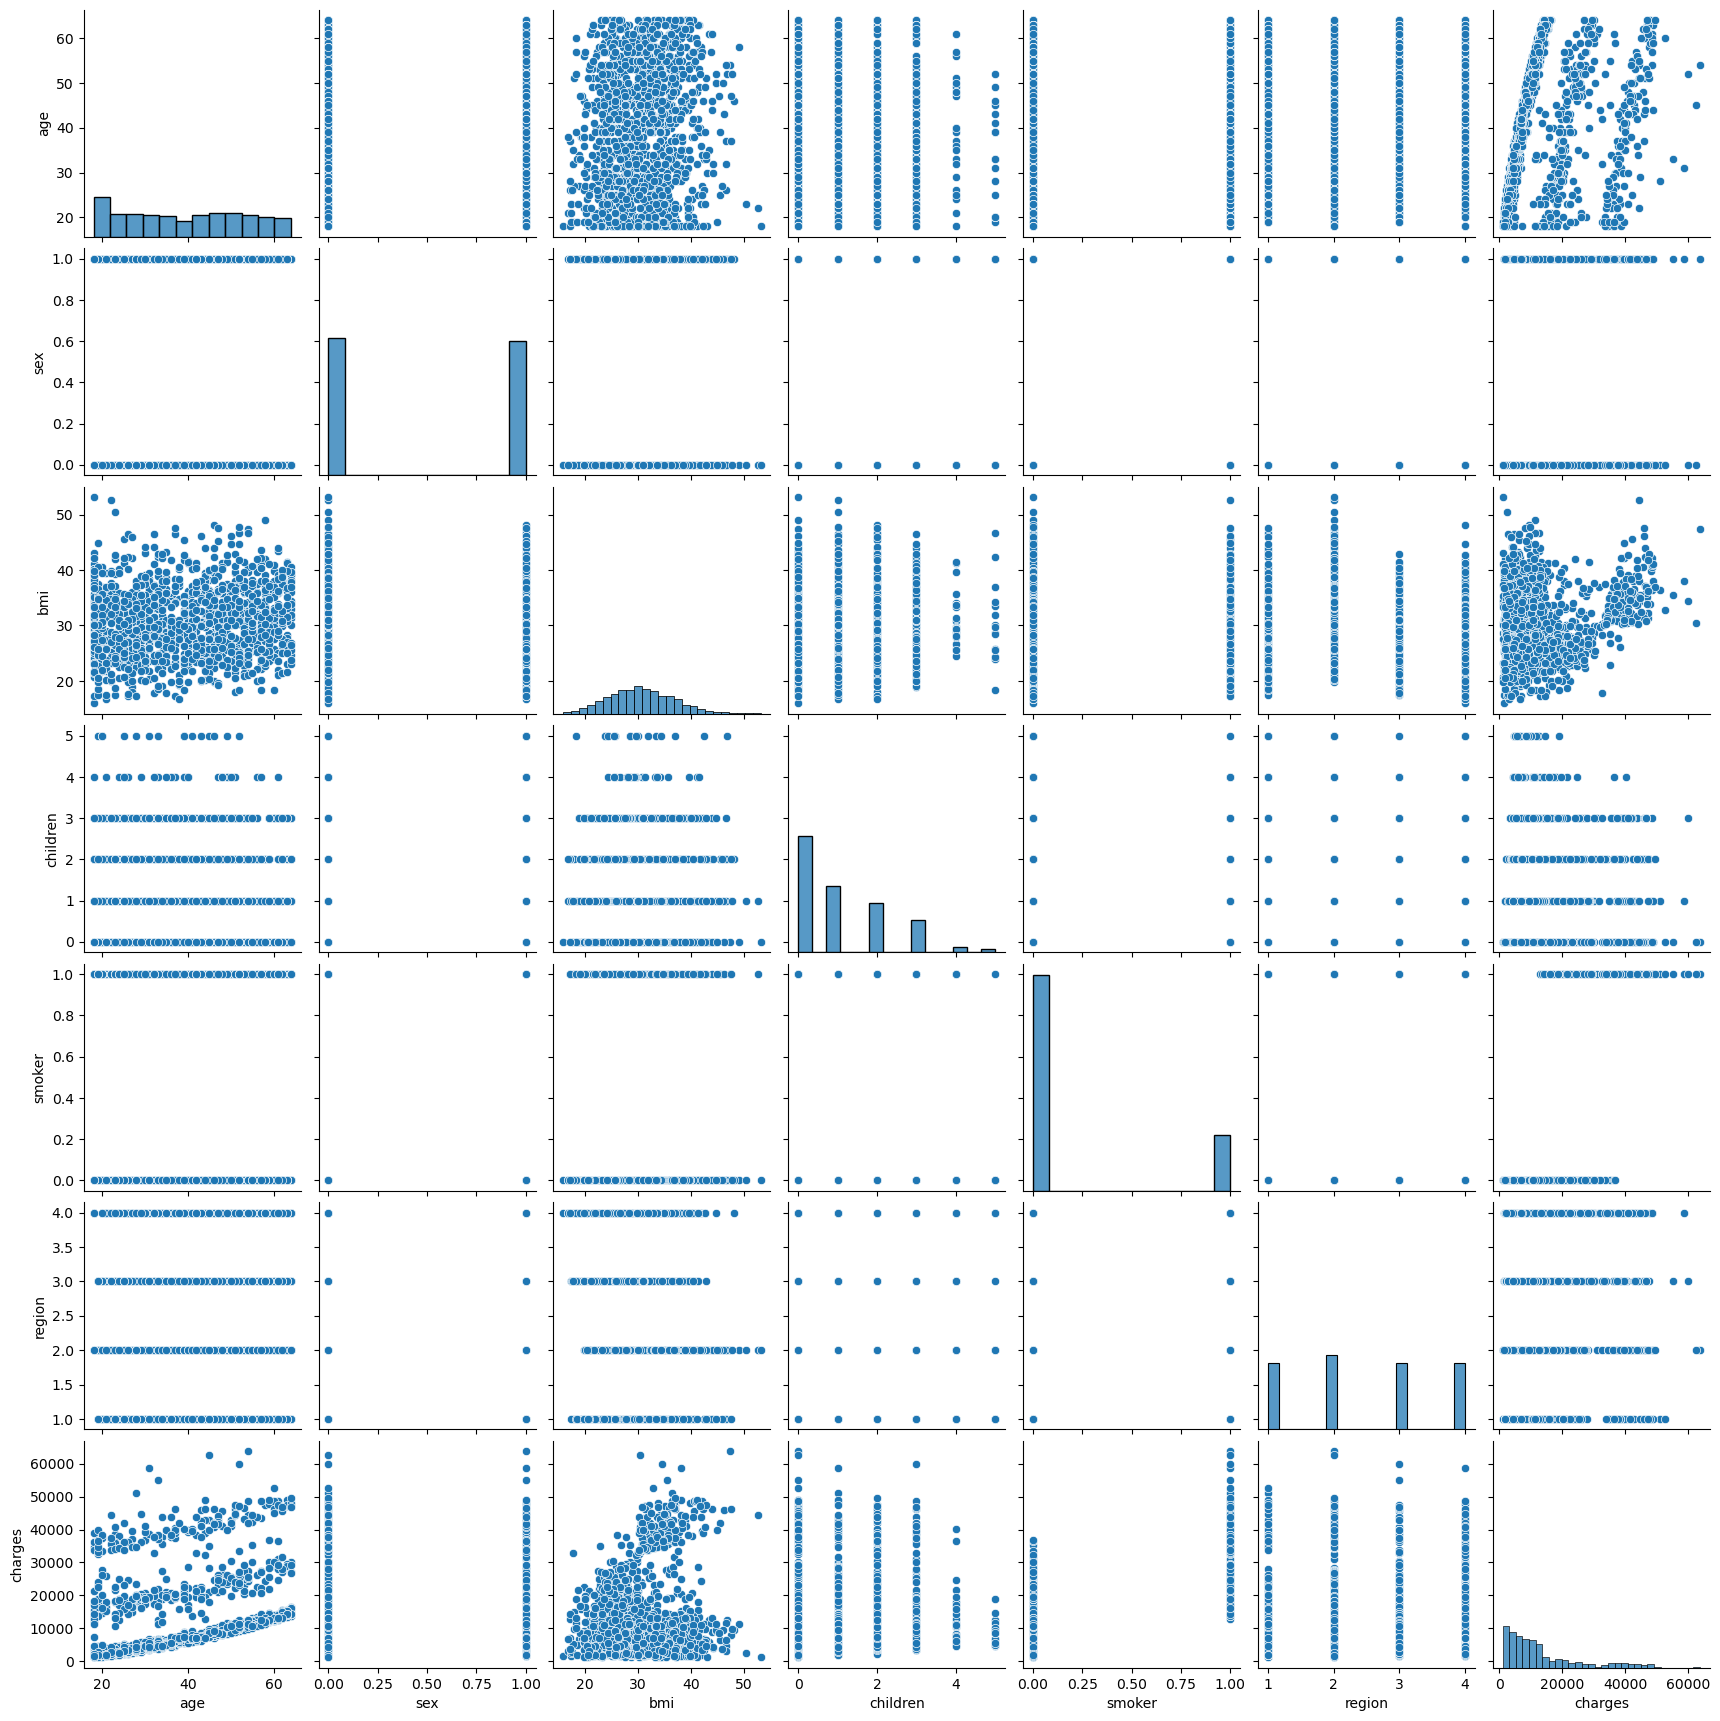

In [25]:
sns.pairplot(df)

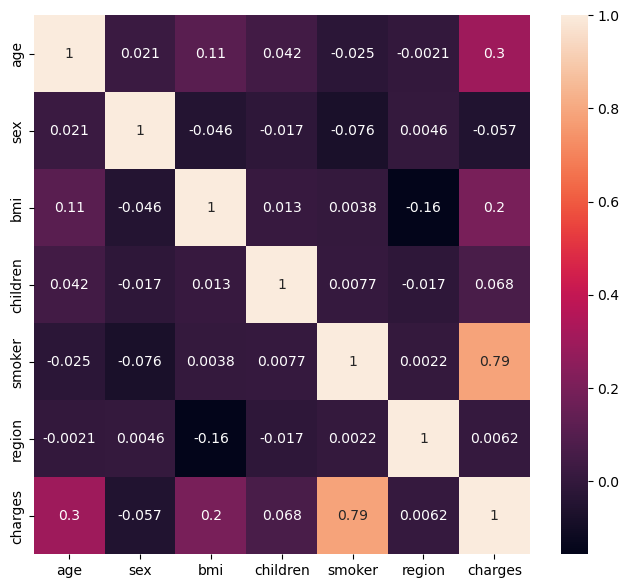

In [28]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

ligher shade show they are highly corelated

# removing outliers

In [30]:
df_new=df[(z<3).all(axis=1)]


In [32]:
df.shape

(1338, 7)

In [31]:
df_new.shape

(1309, 7)

rows droping by 29 number

In [34]:
df=df_new

In [35]:
df.shape

(1309, 7)

In [36]:
x=df.iloc[:,:-1]
x.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,1
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,3
4,32,0,28.880,0,0,3


In [39]:
y= df.iloc[:,-1:]
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [40]:
y.shape

(1309, 1)

# splitting data

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [43]:
print('x_train.shape',x_train.shape)
print('y_train.shape',y_train.shape)
print('x_test.shape',x_test.shape)
print('y_test.shape',y_test.shape)

x_train.shape (877, 6)
y_train.shape (877, 1)
x_test.shape (432, 6)
y_test.shape (432, 1)


# model building

In [44]:
# importing the model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Fit linear model by passing training dataset
lr.fit(x_train,y_train)

LinearRegression()

In [52]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [53]:
lr.score(x_train,y_train)

0.7493924611934304

In [54]:
#predict the value
pred=lr.predict(x_test)
print("predicted insurance cost: ",pred)
print("actual price: ",y_test)

predicted insurance cost:  [[15727.39545308]
 [12456.0662335 ]
 [27031.97374878]
 [  475.43151228]
 [ 9097.29149925]
 [11629.57512168]
 [ 9906.17349483]
 [33952.49754176]
 [15995.15242441]
 [ 7308.95949822]
 [ 6359.60821498]
 [ 7750.04960131]
 [ 2247.21935249]
 [14718.37740108]
 [11444.95346272]
 [11880.92599165]
 [31195.09917115]
 [ 5746.19990508]
 [11861.27983369]
 [ 9696.20033664]
 [ 9049.93720009]
 [31030.83686682]
 [ 8644.51119024]
 [27812.05227609]
 [ 4911.23944055]
 [11554.87629607]
 [ 4337.3926461 ]
 [30970.6798976 ]
 [ 4211.01370064]
 [ 9548.08238576]
 [17314.41925494]
 [ 5734.22544089]
 [27853.36075401]
 [ 1688.01584555]
 [ 6307.72058709]
 [ 6342.2721057 ]
 [ 5663.49488225]
 [10838.08109147]
 [ 9367.4352695 ]
 [ 6938.45970549]
 [32889.89903651]
 [13408.9918818 ]
 [ 1858.54696733]
 [ 9004.58179419]
 [ 2271.16828088]
 [35940.03932623]
 [27441.27398063]
 [ 8377.02742086]
 [-1074.48126608]
 [16914.36286198]
 [ 6590.76367861]
 [16150.82634468]
 [ 1098.14902978]
 [12469.46318711]
 

In [56]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [57]:
print("error:")
print("Mean absolute error: ",mean_absolute_error(y_test,pred))
print("Mean squared error: ",mean_squared_error(y_test,pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error:  4248.605119196662
Mean squared error:  35724343.63310831
Root mean squared error:  5976.984493296624


In [58]:
print(r2_score(y_test,pred))

0.7582625952341788


In [59]:
# Predicting the target variable for test datset
predictions = lr.predict(x_test)

Text(0.5, 1.0, 'Correlation between predicted and actual results.')

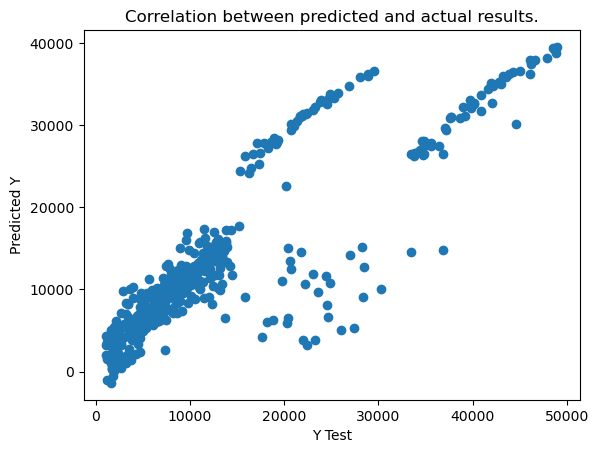

In [60]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.title('Correlation between predicted and actual results.')

In [61]:
# Predict charges for new customer : Name- john
data = {'age' : 40,'sex' : 0,'bmi' : 45.50,'children' : 4,'smoker' : 1,'region' : 3}
index=[1]
john_df = pd.DataFrame(data,index)
john_df

,age,sex,bmi,children,smoker,region
1,40,0,45.5,4,1,3


In [62]:
prediction_result = lr.predict(john_df)
print("Medical Insurance cost for John is : ",prediction_result)

Medical Insurance cost for John is :  [[37830.05775001]]
